Geração de Números Aleatórios

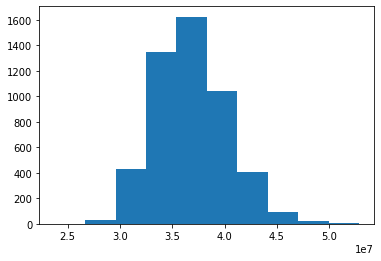

In [17]:
import matplotlib.pyplot as plt
import numpy as np

cenarios = 5000

Receita_anual = np.zeros(cenarios)

for k in range(cenarios):

    mu = 13.17 # mean
    sigma = 1.9194  # standard deviation
    Geracao_PCH = np.random.normal(mu, sigma, 12)
    #print(Geracao_PCH)
    
    mu = 13.60 # mean
    sigma = 3.69  # standard deviation
    Geracao_EOL = np.random.normal(mu, sigma, 12)
    #print(Geracao_EOL)
    
    mu = 269.88 # mean
    sigma = 203.25  # standard deviation
    PLD_NE = np.random.normal(mu, sigma, 12)
    
    for i in range(12):
       if PLD_NE[i] < 69.04:
           PLD_NE[i] = 69.04
    #end for
    for i in range(12):
       if PLD_NE[i] > 678.29:
           PLD_NE[i] = 678.29
    #end for
    
    C2_PCH = 22.00 # FLAT
    Flex = 10.0 # %
    Preco_contrato = 140.0 #R$/MWh
    C2_Flex_Max	= C2_PCH * (1 + (Flex/100))
    C2_Flex_Min = C2_PCH * (1 - (Flex/100))
    
    Gerou_Dentro_da_Flex_max_ou_min = np.zeros(12)
    Gerou_acima_da_Flex_max = np.zeros(12)
    Gerou_Abaixo_da_Flex_min = np.zeros(12)
    Receita_Mensal = np.zeros(12)
    
    num_horas = [744, 672, 744, 720, 744, 720, 744, 744, 720, 744, 720, 744]
    
    for i in range(12):
       soma = Geracao_PCH[i] +  Geracao_EOL[i]
       if (soma > C2_Flex_Min) and (soma < C2_Flex_Max):
           Gerou_Dentro_da_Flex_max_ou_min[i] = soma * num_horas[i] * Preco_contrato
    #end for
    
    for i in range(12):
       soma = Geracao_PCH[i] +  Geracao_EOL[i]
       if soma >= C2_Flex_Max:
           var3 = C2_Flex_Max * num_horas[i] * Preco_contrato
           var4 = (soma - C2_Flex_Max) * num_horas[i] * PLD_NE[i]
           Gerou_acima_da_Flex_max[i] = var3 + var4
    #end for
    
    for i in range(12):
       soma = Geracao_PCH[i] +  Geracao_EOL[i]
       if soma <= C2_Flex_Min:
           var3 = C2_Flex_Min * num_horas[i] * Preco_contrato
           var4 = (soma - C2_Flex_Min) * num_horas[i] * PLD_NE[i]
           Gerou_Abaixo_da_Flex_min[i] = var3 + var4
    #end for
    
    for i in range(12):
        Receita_Mensal[i] = Gerou_Dentro_da_Flex_max_ou_min[i] + Gerou_acima_da_Flex_max[i] + Gerou_Abaixo_da_Flex_min[i]
    #end for
    
    Receita_anual[k] = np.sum(Receita_Mensal)
    #print('Receita_anual = ', Receita_anual)

#end for k in range(cenarios):

x = np.random.normal(170, 10, 250)

plt.hist(Receita_anual)
plt.show() 


In [20]:
vet_ordenado = np.sort(Receita_anual) # Só faz em ordem crescent 
print(vet_ordenado[250])

31730351.660308503
